In [ ]:
!pip install kneed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score, accuracy_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from itertools import product
from kneed import KneeLocator

In [ ]:
breast_df=load_breast_cancer()

In [ ]:
df=pd.DataFrame(breast_df.data, columns=breast_df.feature_names)
df['label']=breast_df.target
df.head()
df['label'].value_counts()

,count
label,
1,357
0,212


In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
X=df.drop(columns='label', axis=1)
y=df['label']

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  PCA

In [ ]:
# Fit PCA on scaled data
pca = PCA()
pca.fit(X_scaled)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
X_pca = PCA(n_components=optimal_components).fit_transform(X_scaled)

# Print results
print("Optimal number of components:", optimal_components)
print("Cumulative explained variance:")
print(cumulative_variance)

Optimal number of components: 10
Cumulative explained variance:
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


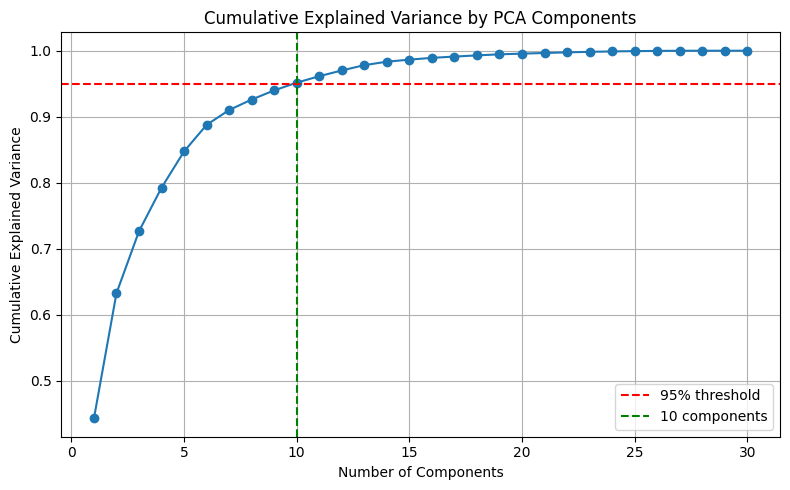

In [ ]:
# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% threshold')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} components')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# KMeans

Optimal number of clusters by Elbow Method: k = 3


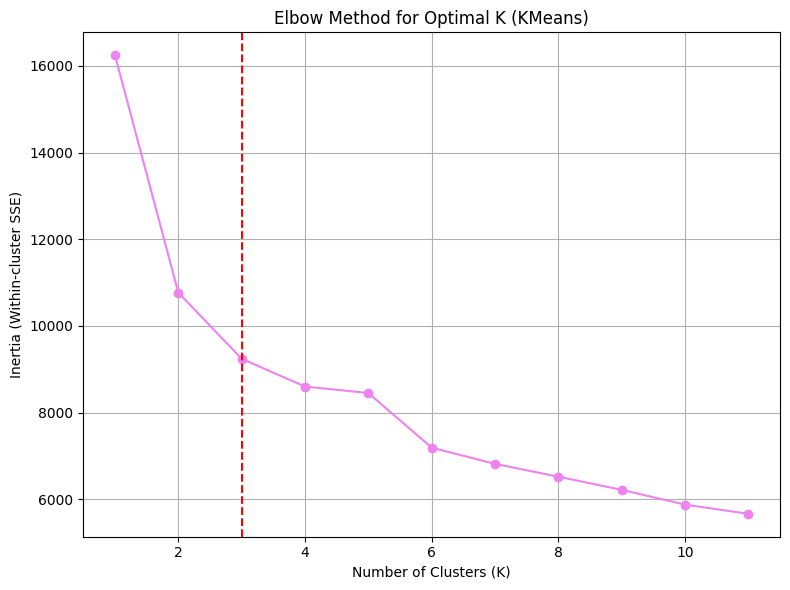

In [ ]:
inertias = []
K_range = range(1, 12)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42, max_iter=1000)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)
# Find the elbow point
knee = KneeLocator(K_range, inertias, curve='convex', direction='decreasing')
optimal_k = knee.elbow
print(f"Optimal number of clusters by Elbow Method: k = {optimal_k}")

# Plot the elbow method
plt.figure(figsize=(8,6))
plt.plot(K_range, inertias, marker='o', linestyle='-', color='violet')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Elbow at k={optimal_k}')
plt.title('Elbow Method for Optimal K (KMeans)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Final KMeans using automatically selected k
best_kmeans_model = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
best_kmeans_labels = best_kmeans_model.fit_predict(X_scaled)
best_kmeans_score = silhouette_score(X_scaled, best_kmeans_labels)
kmeans_ari = adjusted_rand_score(y, best_kmeans_labels)

In [ ]:
kmeans_clust_sizes = pd.Series(best_kmeans_model.labels_).groupby(best_kmeans_model.labels_).size().to_frame()
kmeans_clust_sizes.index.name = 'Cluster'
kmeans_clust_sizes.columns = ["kmeans_clust_sizes"]
kmeans_clust_sizes

,kmeans_clust_sizes
Cluster,
0,110
1,359
2,100


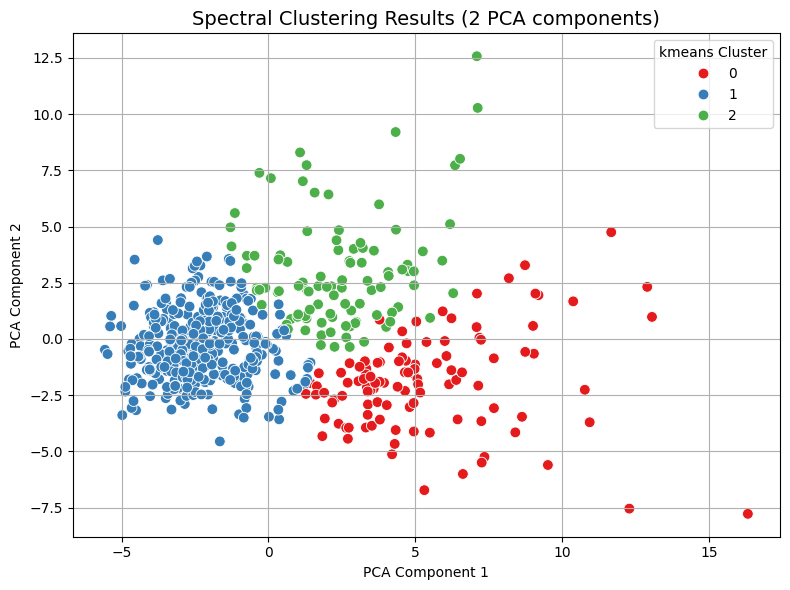

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=best_kmeans_labels, palette='Set1', s=60)
plt.title('Spectral Clustering Results (2 PCA components)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='kmeans Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gaussian Mixture Model (GMM) Clustering

In [ ]:
# Initialize
components = list(range(2, 8))
gmm_sil_scores = []
gmm_ari_scores = []

# Evaluate GMM for different numbers of components
for n in components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    labels = gmm.fit_predict(X_pca)
    sil = silhouette_score(X_pca, labels)

    gmm_sil_scores.append(sil)

    print(f"n_components={n} -> Silhouette: {sil:.3f}")

n_components=2 -> Silhouette: 0.263
n_components=3 -> Silhouette: 0.259
n_components=4 -> Silhouette: 0.162
n_components=5 -> Silhouette: 0.150
n_components=6 -> Silhouette: 0.136
n_components=7 -> Silhouette: 0.138


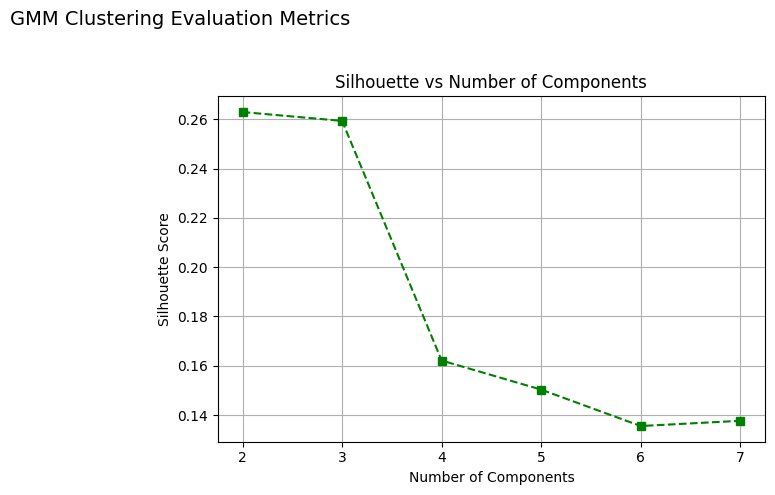

In [ ]:
# Plotting
plt.figure(figsize=(12, 5))

# Silhouette plot
plt.subplot(1, 2, 2)
plt.plot(components, gmm_sil_scores, 's--', color='green')
plt.title('Silhouette vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.suptitle('GMM Clustering Evaluation Metrics', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# Best model based on sil
best_index = np.argmax(gmm_sil_scores)
best_n = components[best_index]
best_sil = gmm_sil_scores[best_index]

# Fit best model on full data
best_gmm_model = GaussianMixture(n_components=best_n, random_state=42)
best_gmm_labels = best_gmm_model.fit_predict(X_scaled)
final_sil = silhouette_score(X_scaled, best_gmm_labels)

# Summary
print(f"\nBest n_components: {best_n}, Silhouette: {best_sil:.3f}")


Best n_components: 2, Silhouette: 0.263


In [ ]:
# Cluster size table
gmm_clust_sizes = pd.Series(best_gmm_labels).value_counts().sort_index().to_frame(name='gmm_clust_sizes')
gmm_clust_sizes.index.name = 'Cluster'
display(gmm_clust_sizes)

,gmm_clust_sizes
Cluster,
0,214
1,355


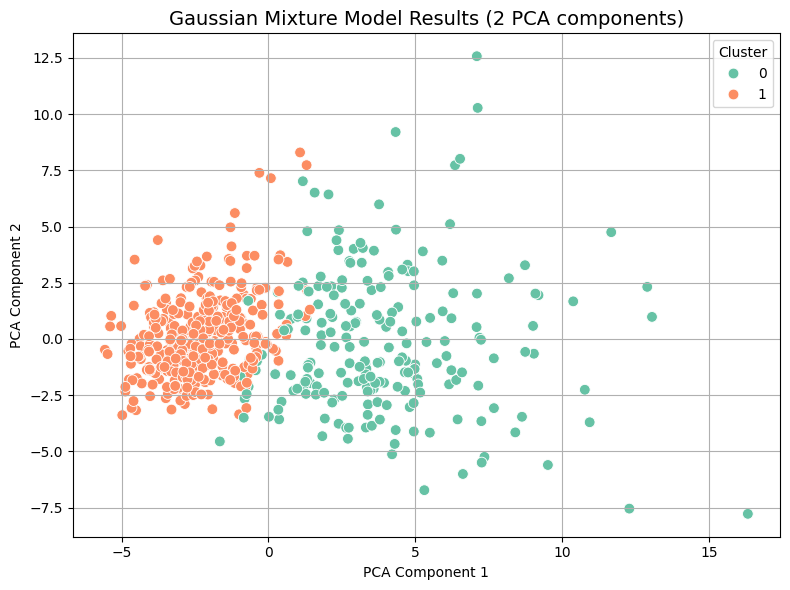

In [ ]:
#GMM plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=best_gmm_labels, palette='Set2', s=60)
plt.title('Gaussian Mixture Model Results (2 PCA components)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# Spectral Clustering

In [ ]:
# Spectral Clustering
ari_scores = []
sil_scores = []
params = []

for nc in range(2, 7):
    for k in range(3, 21):
        try:
            model = SpectralClustering(n_clusters=nc, affinity='nearest_neighbors', n_neighbors=k, random_state=42)
            labels = model.fit_predict(X_scaled)
            if len(set(labels)) > 1:
                sil = silhouette_score(X_scaled, labels)
                ari = adjusted_rand_score(y, labels)
                ari_scores.append(ari)
                sil_scores.append(sil)
                params.append((nc, k))
                print(f"n_clusters={nc}, n_neighbors={k} -> ARI: {ari:.3f}, Silhouette: {sil:.3f}")
        except Exception as e:
            print(f"Failed for n_clusters={nc}, n_neighbors={k} -> {e}")

n_clusters=2, n_neighbors=3 -> ARI: 0.664, Silhouette: 0.342
n_clusters=2, n_neighbors=4 -> ARI: 0.730, Silhouette: 0.338
n_clusters=2, n_neighbors=5 -> ARI: 0.779, Silhouette: 0.336
n_clusters=2, n_neighbors=6 -> ARI: 0.773, Silhouette: 0.339
n_clusters=2, n_neighbors=7 -> ARI: 0.767, Silhouette: 0.337
n_clusters=2, n_neighbors=8 -> ARI: 0.761, Silhouette: 0.335
n_clusters=2, n_neighbors=9 -> ARI: 0.773, Silhouette: 0.335
n_clusters=2, n_neighbors=10 -> ARI: 0.761, Silhouette: 0.337
n_clusters=2, n_neighbors=11 -> ARI: 0.773, Silhouette: 0.335
n_clusters=2, n_neighbors=12 -> ARI: 0.780, Silhouette: 0.336
n_clusters=2, n_neighbors=13 -> ARI: 0.780, Silhouette: 0.336
n_clusters=2, n_neighbors=14 -> ARI: 0.780, Silhouette: 0.336
n_clusters=2, n_neighbors=15 -> ARI: 0.780, Silhouette: 0.336
n_clusters=2, n_neighbors=16 -> ARI: 0.773, Silhouette: 0.336
n_clusters=2, n_neighbors=17 -> ARI: 0.780, Silhouette: 0.337
n_clusters=2, n_neighbors=18 -> ARI: 0.755, Silhouette: 0.336
n_clusters=2, n

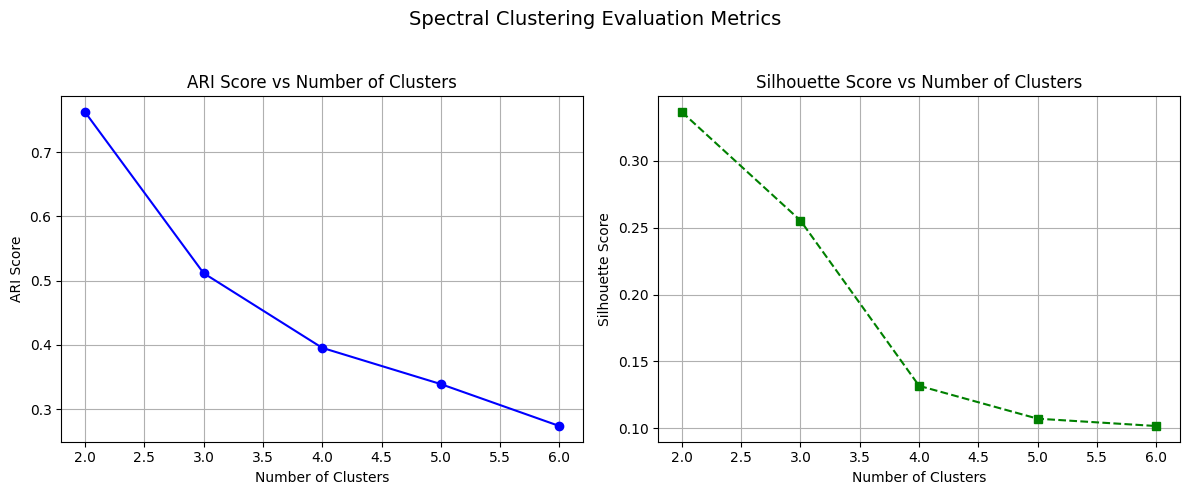

In [ ]:
cluster_values = list(range(2, 7))

ari_avg = [np.mean([ari for (nc, _), ari in zip(params, ari_scores) if nc == n]) for n in cluster_values]
sil_avg = [np.mean([sil for (nc, _), sil in zip(params, sil_scores) if nc == n]) for n in cluster_values]

# ... (rest of plotting code remains the same)
plt.figure(figsize=(12, 5))

# ARI Score Plot
plt.subplot(1, 2, 1)
plt.plot(cluster_values, ari_avg, 'o-', color='blue')
plt.title('ARI Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('ARI Score')
plt.grid(True)

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(cluster_values, sil_avg, 's--', color='green')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.suptitle('Spectral Clustering Evaluation Metrics', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
# Find best
best_ari = max(ari_scores)
best_index = ari_scores.index(best_ari)
best_nc, best_k = params[best_index]
best_sil = sil_scores[best_index]

# Fit best model
best_model = SpectralClustering(n_clusters=best_nc, affinity='nearest_neighbors', n_neighbors=best_k, random_state=42)
best_spec_labels = best_model.fit_predict(X_scaled)
best_spec_score = silhouette_score(X_scaled, best_spec_labels)

print(f"\nBest params: n_clusters={best_nc}, n_neighbors={best_k}, Best ARI: {best_ari:.3f}, Best Silhouette: {best_sil:.3f}")


Best params: n_clusters=2, n_neighbors=12, Best ARI: 0.780, Best Silhouette: 0.336


In [ ]:
spec_clust_sizes = pd.Series(best_spec_labels).groupby(best_spec_labels).size().to_frame()
spec_clust_sizes.index.name = 'Cluster'  # Set the index name to 'Cluster'
spec_clust_sizes

,0
Cluster,
0,189
1,380


In [ ]:
best_spec_labels[:5]

array([0, 0, 0, 0, 0], dtype=int32)

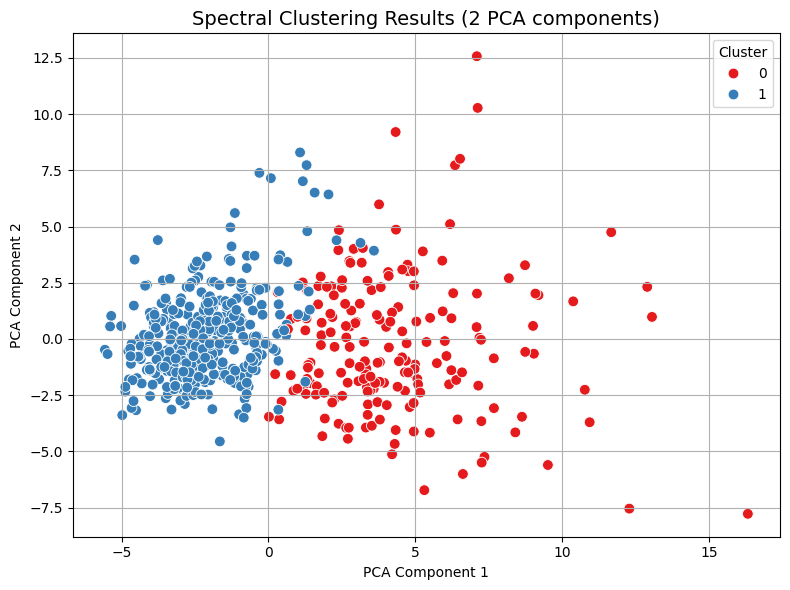

In [ ]:
#Spectral clustering plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=best_spec_labels, palette='Set1', s=60)
plt.title('Spectral Clustering Results (2 PCA components)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# DBSCAN (Density-Based Clustering)

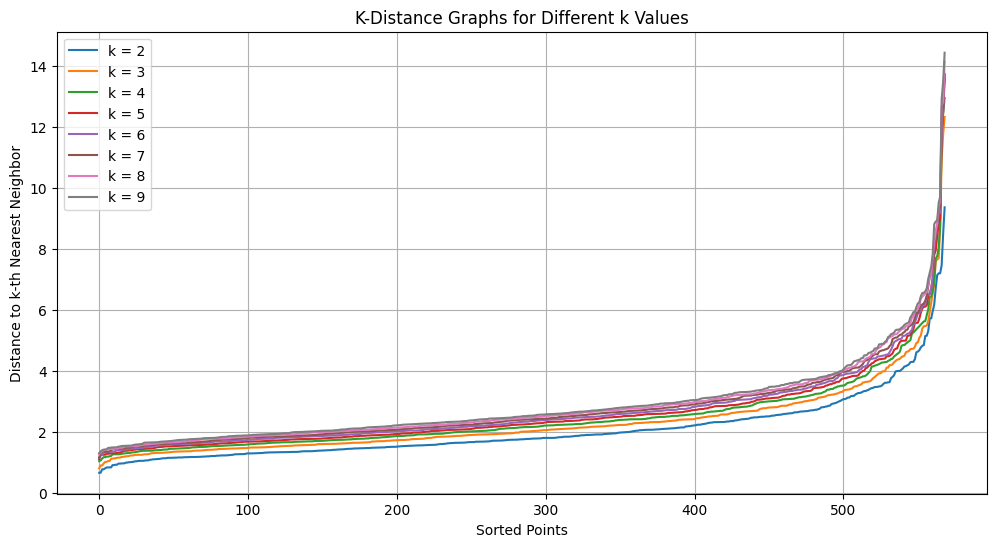

Detected eps candidates from elbow:
k = 2 → eps ≈ 4.29
k = 3 → eps ≈ 4.73
k = 4 → eps ≈ 4.29
k = 5 → eps ≈ 5.58
k = 6 → eps ≈ 5.05
k = 7 → eps ≈ 4.74
k = 8 → eps ≈ 4.57
k = 9 → eps ≈ 5.37


In [ ]:
# Step 2: K-distance plots
k_values = range(2, 10)
knee_points = {}

plt.figure(figsize=(12, 6))
for k in k_values:
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X_pca)
    distances, indices = neighbors_fit.kneighbors(X_pca)
    k_distances = np.sort(distances[:, k - 1])

    plt.plot(k_distances, label=f'k = {k}')
    try:
        kneedle = KneeLocator(range(len(k_distances)), k_distances, curve="convex", direction="increasing")
        if kneedle.knee_y:
            eps_val = round(kneedle.knee_y, 2)
            knee_points[k] = eps_val
    except:
        pass

plt.title('K-Distance Graphs for Different k Values')
plt.xlabel('Sorted Points')
plt.ylabel('Distance to k-th Nearest Neighbor')
plt.grid(True)
plt.legend()
plt.show()
# Step 3: Print eps candidates
print("Detected eps candidates from elbow:")
for k in knee_points:
    print(f"k = {k} → eps ≈ {knee_points[k]}")

In [ ]:
#DBSCAN Grid search parameters
eps_values = knee_points.values()
min_samples = np.arange(2, 10)
DBSCAN_params = list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []
noise_ratios = []

In [ ]:
for eps, min_samp in DBSCAN_params:


    model = DBSCAN(eps=eps, min_samples=min_samp).fit(X_pca)
    labels = model.labels_
    unique_labels = set(labels)
    unique_labels.discard(-1)

    no_of_clusters.append(len(unique_labels))
    noise_ratios.append(np.mean(labels == -1))

    if len(unique_labels) > 1:
        try:
            score = silhouette_score(X_pca, labels)
        except:
            score = np.nan
    else:
        score = np.nan
    sil_score.append(score)

In [ ]:
# Prepare dataframe for heatmaps
results_df = pd.DataFrame(DBSCAN_params, columns=['Eps', 'Min_samples'])
results_df['No_of_clusters'] = no_of_clusters
results_df['Sil_score'] = sil_score
results_df['Noise_ratio'] = noise_ratios

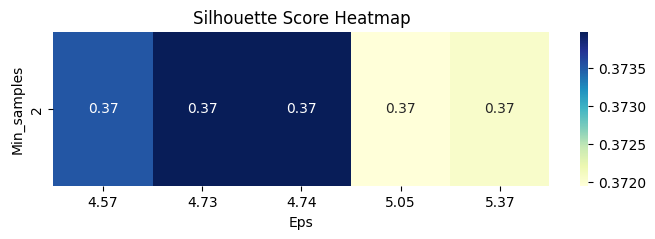

In [ ]:
# Heatmap: Silhouette Scores
pivot_sil = pd.pivot_table(results_df, values='Sil_score', index='Min_samples', columns='Eps')
plt.figure(figsize=(8, 2))
sns.heatmap(pivot_sil, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Silhouette Score Heatmap')
plt.show()

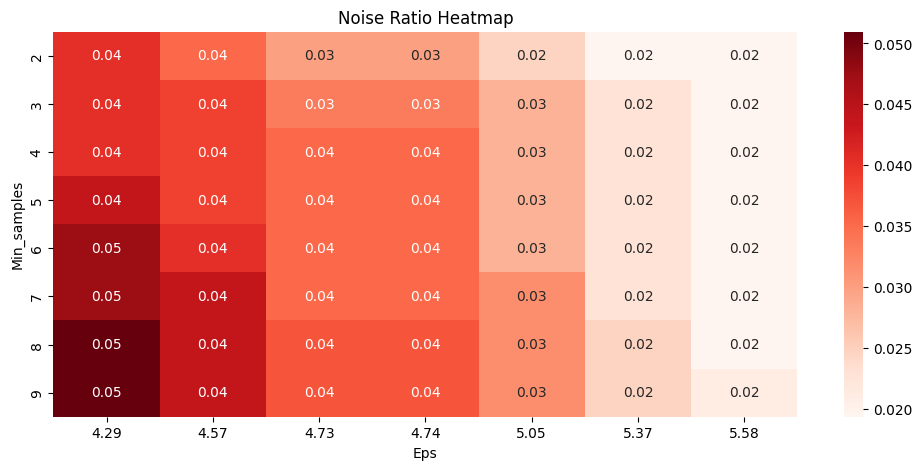

In [ ]:
# Heatmap: Noise Ratio Heatmap
pivot_noise = pd.pivot_table(results_df, values='Noise_ratio', index='Min_samples', columns='Eps')
plt.figure(figsize=(12, 5))
sns.heatmap(pivot_noise, annot=True, fmt=".2f", cmap="Reds")
plt.title('Noise Ratio Heatmap')
plt.show()

In [ ]:
best_db_index = results_df['Sil_score'].idxmax()
best_db_eps = results_df.loc[best_db_index, 'Eps']
best_db_min_samples = results_df.loc[best_db_index, 'Min_samples']
DBS_clustering = DBSCAN(eps=best_db_eps, min_samples=best_db_min_samples).fit(X_pca)
best_db_labels = DBS_clustering.labels_
best_db_score = silhouette_score(X_scaled, best_db_labels)

# Convert X_scaled to DataFrame before using .loc
DBSCAN_clustered = pd.DataFrame(X_scaled)
DBSCAN_clustered['Cluster'] = DBS_clustering.labels_

DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

# Assuming you want to find the best parameters based on Silhouette score


# Convert X_scaled to DataFrame before using .loc
DBSCAN_clustered = pd.DataFrame(X_scaled)
DBSCAN_clustered['Cluster'] = DBS_clustering.labels_

DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,17
0,550
1,2


# Clustering Evaluation Metrics and Results

In [ ]:
# Calculate metrics for each model
kmeans_ari = adjusted_rand_score(y, best_kmeans_labels)
kmeans_sil = silhouette_score(X_pca, best_kmeans_labels)

best_gmm_ari = adjusted_rand_score(y, best_gmm_labels)
best_gmm_sil = silhouette_score(X_scaled, best_gmm_labels)

best_spec_ari = adjusted_rand_score(y, best_spec_labels)
best_spec_sil = silhouette_score(X_scaled, best_spec_labels)

# Collect metrics in structured dict format
metrics = [
    {
        "Model": f"KMeans (k={optimal_k})","ARI": round(kmeans_ari, 3),"Silhouette": round(kmeans_sil, 3),
        "DBI": round(davies_bouldin_score(X_pca, best_kmeans_labels), 3),
        "CHI": round(calinski_harabasz_score(X_pca, best_kmeans_labels), 1)},
    {
        "Model": f"GMM (k={best_n})", "ARI": round(best_gmm_ari, 3), "Silhouette": round(best_gmm_sil, 3),
        "DBI": round(davies_bouldin_score(X_scaled, best_gmm_labels), 3),
        "CHI": round(calinski_harabasz_score(X_scaled, best_gmm_labels), 1)},
    {
        "Model": f"Spectral (k={best_nc}, neighbors={best_k})", "ARI": round(best_spec_ari, 3),
        "Silhouette": round(best_spec_sil, 3),"DBI": round(davies_bouldin_score(X_scaled, best_spec_labels), 3),
        "CHI": round(calinski_harabasz_score(X_scaled, best_spec_labels), 1) }
]
if 'best_db_labels' in locals():
    filtered = best_db_labels != -1
    metrics.append({
        "Model": f"DBSCAN (eps={best_db_eps:.1f},neighbor=:{k},sample={best_db_min_samples})",
        "ARI": round(adjusted_rand_score(y[filtered], best_db_labels[filtered]), 3),
        "Silhouette": round(silhouette_score(X_pca[filtered], best_db_labels[filtered]), 3),
        "DBI": round(davies_bouldin_score(X_pca[filtered], best_db_labels[filtered]), 3),
        "CHI": round(calinski_harabasz_score(X_pca[filtered], best_db_labels[filtered]), 1)
    })

# Create and display DataFrame
metrics_df = pd.DataFrame(metrics)
print("\n--- Clustering Evaluation Metrics ---")
print(metrics_df)



--- Clustering Evaluation Metrics ---
                                   Model    ARI  Silhouette    DBI    CHI
0                           KMeans (k=3)  0.511       0.326  1.457  214.5
1                              GMM (k=2)  0.774       0.314  1.377  247.3
2           Spectral (k=2, neighbors=12)  0.780       0.336  1.320  258.7
3  DBSCAN (eps=4.7,neighbor=:9,sample=2) -0.003       0.392  0.706    7.5


In [ ]:
# Supervised SVM
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred)
svm_acc

0.9736842105263158

<Figure size 600x500 with 0 Axes>

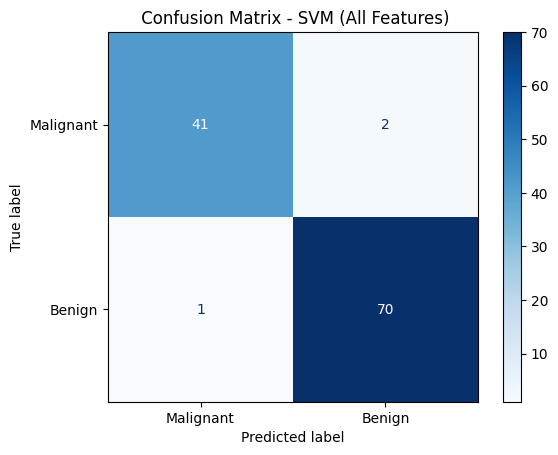

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign'])

# Plot
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues')
plt.title(" Confusion Matrix - SVM (All Features)")
plt.grid(False)
plt.show()

# Plot and visualizations

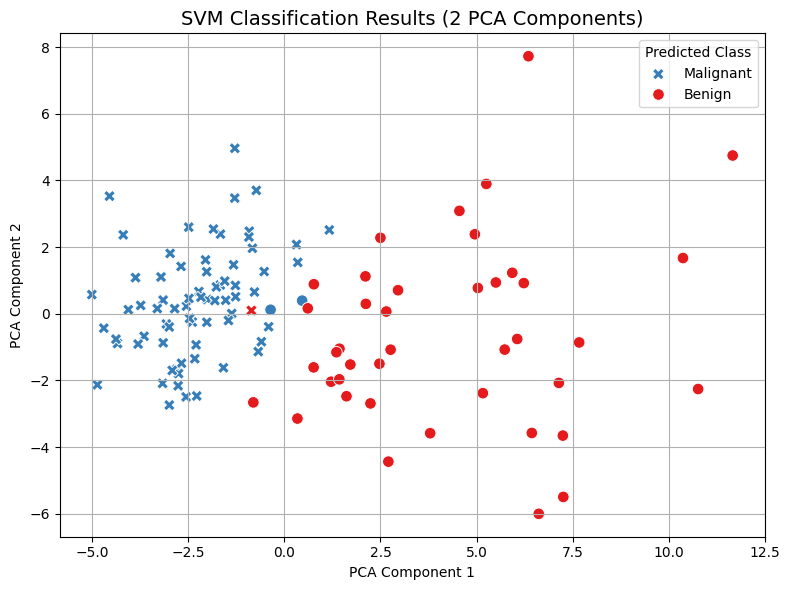

In [ ]:
#SVM
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred, palette='Set1', s=70, style=y_test, markers=["o", "X"]) # Use X_test instead of X_pca
plt.title('SVM Classification Results (2 PCA Components)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Predicted Class', labels=['Malignant', 'Benign'])
plt.grid(True)
plt.tight_layout()
plt.show()